### (a) XOR (disyunción exclusiva)

Este problema encaja con la lógica proposicional del operador lógico XOR. Este operador sólo es Verdadero cuando ambas preposiciones son diferentes, por consiguiente es Falso cuando ambas preposiciones toman el mismo valor. La tabla de verdad para XOR es la siguiente:

|      A     |     B     |  A XOR B  |
|:----------:|:---------:|:---------:|
| Verdadero  | Verdadero |   Falso   |
|  Verdadero |   Falso   | Verdadero |
|    Falso   | Verdadero | Verdadero |
|    Falso   |   Falso   |   Falso   |

Entonces, A y B corresponden al par $x = (x_1, x_2) \in R^2$, con Falso < 0 y Verdadero > 0 y el operador XOR sobre A y B corresponde a $y = \in \{-1, 1\}$, siendo en este caso Falso = -1 y Verdadero = 1 obteniendo el problema no lineal deseado.

In [19]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def do_XOR(n=1000,noisy_n=100,svm=True):
    rng = np.random.RandomState(0)

    # Conjunto de entrenamiento
    X_train = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_train = np.logical_xor(X_train[:,0] > 0, X_train[:,1] > 0)
    Y_train = 2*Y_train-1 if svm else Y_train

    # Generación de ruido
    X_noisy= rng.uniform(low=-0.8,high=0.2,size=(noisy_n,2))
    Y_noisy = -1*np.logical_xor(X_noisy[:,0] > 0, X_noisy[:,1] > 0) + 1
    Y_noisy = 2*Y_noisy-1 if svm else Y_noisy
    
    # Se incorpora el ruido en el conjunto de entrenamiento
    X_train = np.vstack((X_train, X_noisy))
    Y_train = np.hstack((Y_train, Y_noisy))

    # Conjunto de prueba
    X_test = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    Y_test = 2*Y_test - 1 if svm else Y_test
    
    return X_train,Y_train,X_test,Y_test

X_train,Y_train,X_test,Y_test = do_XOR()

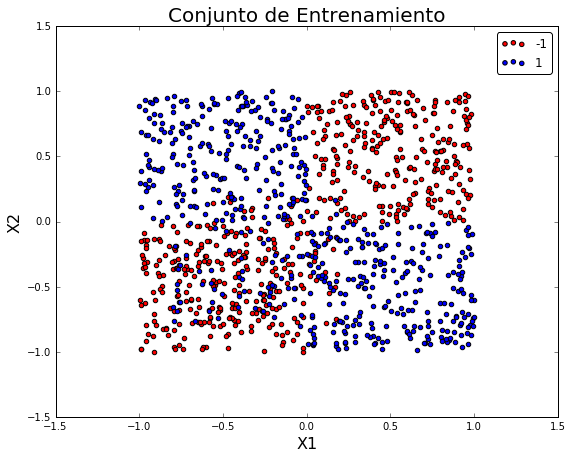

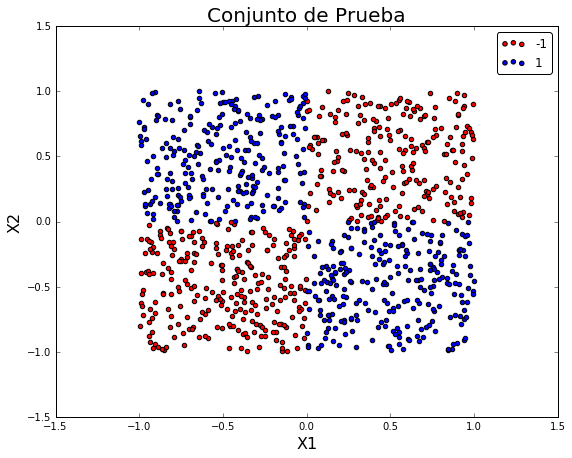

In [2]:
#import seaborn as sns
def plot_data(x, y, title):
    mclasses=(-1,1)
    mcolors = ['red', 'blue']
    plt.figure(figsize=(9, 7))

    for lab, col in zip(mclasses,mcolors):
        plt.scatter(x[y==lab, 0], x[y==lab, 1], label=lab, c=col)

    plt.title(title, fontsize = 20)
    plt.xlabel('X1', fontsize = 16)
    plt.ylabel('X2', fontsize = 16)
    leg = plt.legend(loc='upper right', fancybox=True)

    plt.show()

plot_data(X_train, Y_train, 'Conjunto de Entrenamiento')
plot_data(X_test, Y_test, 'Conjunto de Prueba')

### b) SVM-lineal

Primero se obtiene la probabilidad *a-priori* de cada clase.

In [3]:
prob_negativa = len(X_train[Y_train == -1]) / float(len(X_train[:,0]))
prob_positiva = len(X_train[Y_train == +1]) / float(len(X_train[:,0]))
print "Probabilidad de que un nuevo dato se clasifique en la clase -1: %f"% (prob_negativa)
print "Probabilidad de que un nuevo dato se clasifique en la clase +1: %f"% (prob_positiva)

Probabilidad de que un nuevo dato se clasifique en la clase -1: 0.500909
Probabilidad de que un nuevo dato se clasifique en la clase +1: 0.499091


Por lo que una mejora del $50\%$ significa que el clasificador obtenga un accuracy aproximado de un $75\%$.

In [14]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y, xt, yt, text):
    acc_tr = model.score(x, y)
    acc_test = model.score(xt, yt)
    print "Training Accuracy %s: %f"%(text, acc_tr)
    print "Test Accuracy %s: %f"%(text, acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['-1','+1']))
    
def plot_classifier(clf,X_train,Y_train,X_test,Y_test, model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(14, 14))
    axis.scatter(X_train[:,0],X_train[:,1],s=5,c=Y_train,zorder=10,cmap='gray')
    axis.scatter(X_test[:,0],X_test[:,1],s=15,c=Y_test,zorder=10,cmap='gray')
    XX, YY = np.mgrid[-1:1:200j, -1:1:200j]
    if model_type == 'svm':
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: 
        raise ValueError('model type not supported')

    mcolor = plt.cm.Accent
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0 if model_type == 'svm' else Z > 0.5
    #axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.pcolormesh(XX, YY, Zplot ,cmap=mcolor)
    axis.contour(XX, YY, Z, alpha=1, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-1, 0, 1])

    plt.show()

Mejor parámetro de regularización C: 0.104811313415
Mejor Accuracy de Test: 0.492000


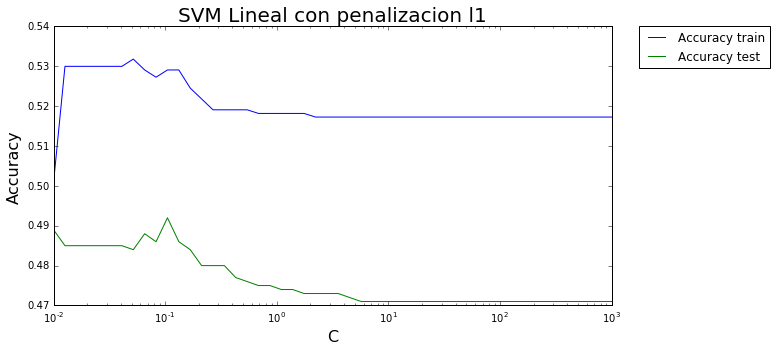

Mejor parámetro de regularización C: 1000.0
Mejor Accuracy de Test: 0.663000


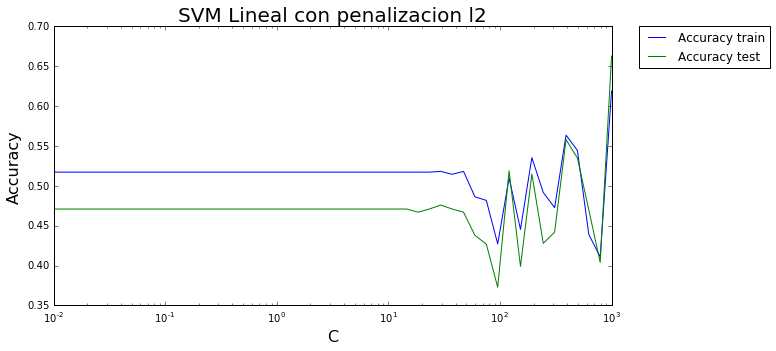

Training Accuracy SVM l1: 0.529091
Test Accuracy SVM l1: 0.492000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.48      0.47      0.47       489
         +1       0.50      0.52      0.51       511

avg / total       0.49      0.49      0.49      1000

Training Accuracy SVM l2: 0.619091
Test Accuracy SVM l2: 0.663000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         -1       0.97      0.32      0.48       489
         +1       0.60      0.99      0.75       511

avg / total       0.78      0.66      0.62      1000



In [9]:
from sklearn.svm import LinearSVC

def SVM_to_fit(x,y,xt,yt,norm):
    Cs = np.logspace(-2, 3,base=10)
    acc_tr = []
    acc_test = []
    models = []
    for C in Cs:
        if(norm == 'l1'):
            model = LinearSVC(C=C, penalty=norm, dual=False)
        else:
            model = LinearSVC(C=C, penalty=norm)

        model = model.fit(x, y)
        acc_tr.append(model.score(x,y))
        acc_test.append(model.score(xt, yt))
        models.append(model)
    
    C_best = Cs[acc_test.index(max(acc_test))]
    model_best = models[acc_test.index(max(acc_test))]
    print "Mejor parámetro de regularización C: %s"%(C_best)
    print "Mejor Accuracy de Test: %f"%(max(acc_test))

    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.plot(Cs,acc_tr,label='Accuracy train')
    ax.plot(Cs,acc_test,label='Accuracy test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('C', fontsize= 16)
    plt.ylabel('Accuracy', fontsize= 16)
    plt.title('SVM Lineal con penalizacion %s'%(norm), fontsize= 20)
    ax.set_xscale('log')
    plt.show()
    
    return model_best, C_best

model1, C = SVM_to_fit(X_train, Y_train, X_test, Y_test, 'l1')
model2, C = SVM_to_fit(X_train, Y_train, X_test, Y_test, 'l2')

score_the_model(model1, X_train, Y_train, X_test, Y_test, "SVM l1")
score_the_model(model2, X_train, Y_train, X_test, Y_test, "SVM l2")

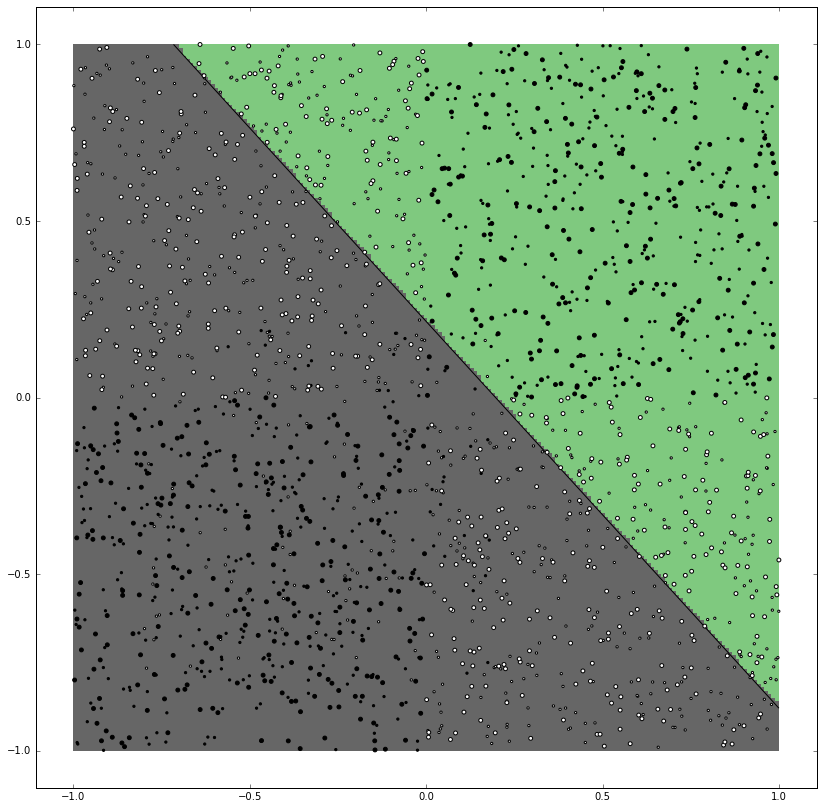

In [7]:
plot_classifier(model2,X_train,Y_train, X_test, Y_test, 'svm')

### (c) SVM no lineal

In [10]:
print np.logspace(-2, 4,base=2)

[  0.25         0.27214529   0.29625224   0.32249461   0.35106155
   0.382159     0.41601109   0.45286183   0.49297686   0.53664533
   0.58418199   0.63592952   0.69226089   0.75358217   0.82033536
   0.89300162   0.97210474   1.05821491   1.15195282   1.25399415
   1.36507441   1.48599429   1.61762539   1.76091654   1.91690058
   2.08670186   2.27154434   2.47276039   2.69180039   2.9302432
   3.18980756   3.47236443   3.77995051   4.11478293   4.4792752
   4.87605462   5.30798122   5.77816838   6.29000526   6.84718126
   7.45371255   8.1139711    8.83271611   9.61512839  10.46684767
  11.39401323  12.4033082   13.50200769  14.69803127  16.        ]


Test Accuracy = 0.954000


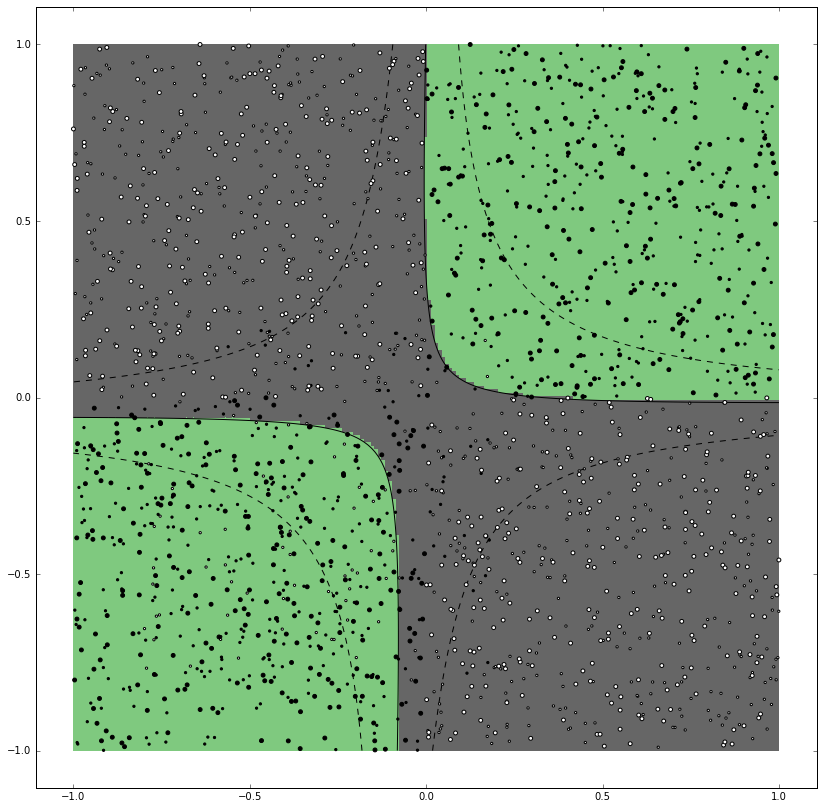

In [18]:
from sklearn.svm import SVC

#clf = SVC(C=100, kernel='rbf')
clf = SVC(C=10, kernel='poly',degree=2, coef0=1)
clf.fit(X_train, Y_train)
print "Test Accuracy = %f"%clf.score(X_test,Y_test)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'svm')

C:\Users\theda\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\theda\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\theda\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\theda\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


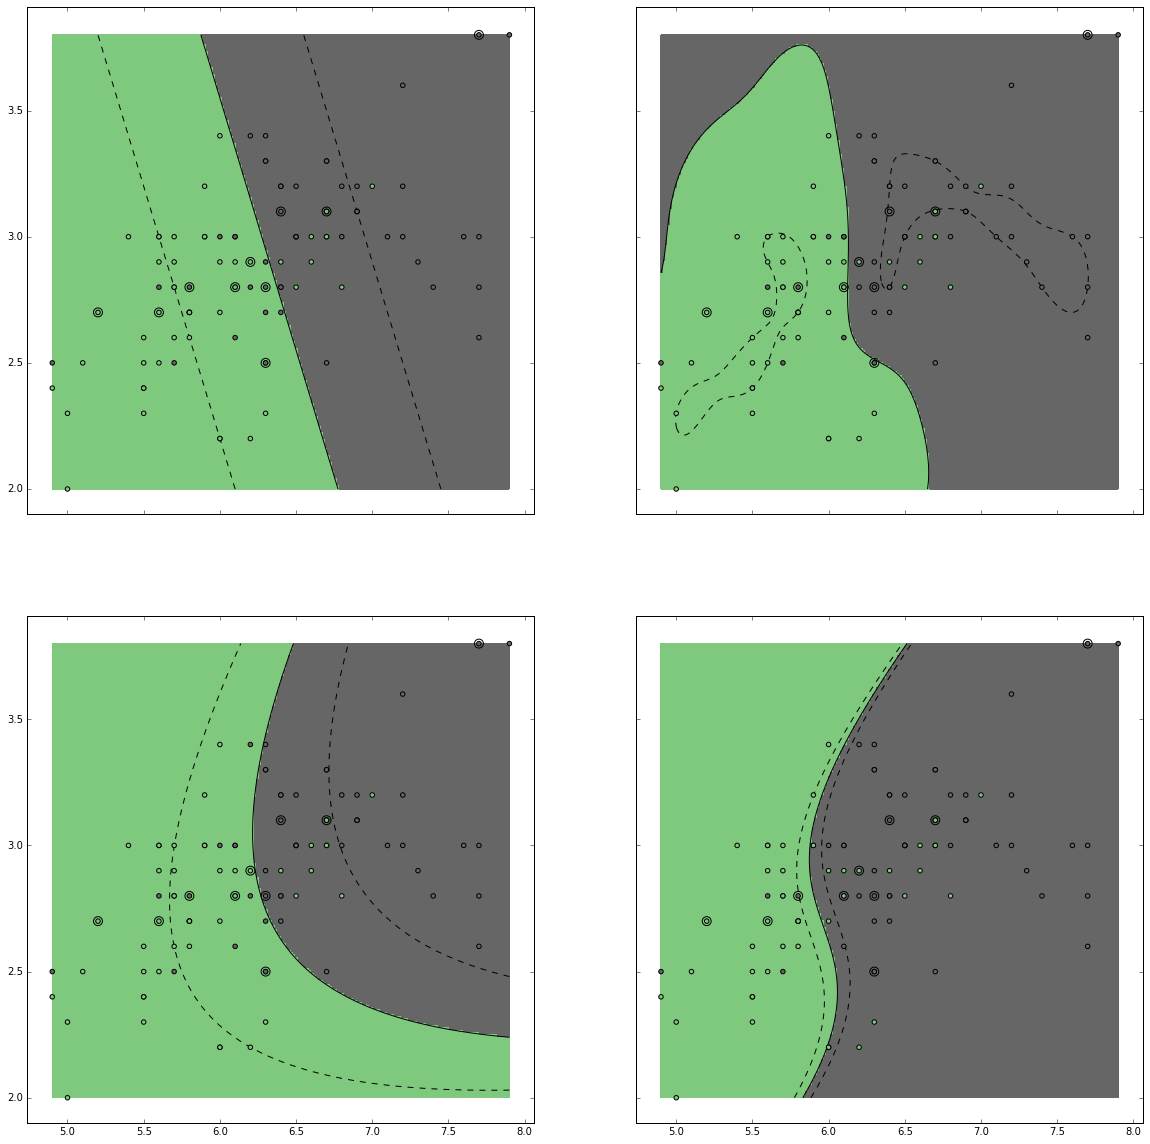

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]

mkernels = ('linear', 'rbf', 'poly','poly')
degrees = (2,3)
onekernel = 'linear'
plot_all = False
f, axiss = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(20, 20))

axiss = axiss.flatten()
turn = 1

mcolor = plt.cm.Accent

for fig_num, kernel in enumerate(mkernels):

    if kernel == 'poly':
        turn = (turn+1)%2

    clf = svm.SVC(C=0.5,kernel=kernel,gamma=10,degree=degrees[turn])
    clf.fit(X_train, y_train)

    axis = axiss[fig_num]
    axis.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=mcolor)

    # Circle out the test data
    axis.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    axis.pcolormesh(XX, YY, Z > 0, cmap=mcolor)
    axis.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

    #plt.title(kernel)

plt.show()